<b><font color="red" size="6"></font></b>

# 1. 기존의 회귀분석
- 회귀분석(linear regression) 설명 사이트 :
https://gbhat.com/machine_learning/linear_regression.html
- 오차함수 : MSE(오차제곱평균), RMSE(루트를 취하기 때문에 MSE의 단점이 어
느정도 해소. 이상치에 덜 민감), MAE(mean absolute erro error ; 절대값평균)
https://jysden.medium.com/%EC%96%B8%EC%A0%9C-mse-mae-rmse%EB%A5%BC-%EC%82%AC%EC%9A%A9%ED%95%98%EB%8A%94%EA%B0%80-c473bd831c62
- 경사하강법 설명
![image](https://miro.medium.com/v2/resize:fit:720/format:webp/1*XRXgMqrr5rq-V1rW7SkrtA.png)
- https://www.mql5.com/ko/articles/11200


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 섭씨 온도 (input_data)를 받아 화씨온도로 출력
def celsisu_to_faherenheit(c):
    return c * 1.8 + 32

In [3]:
input_c = int(input('섭씨온도는?'))
print('화씨온도는', celsisu_to_faherenheit(input_c))

섭씨온도는?20
화씨온도는 68.0


# 2. 머신러닝 프로그램
- 1. 데이터 확보 및 생성(inputdata, outputdata)
- 2. 데이터 전처리 (결측치, 훈련데이터셋과 검증데이터셋, 시험데이터셋으로 분류....)
- 3. 모델 구성
- 4. 모델 학습 과정 설정 (손실함수, 옵티마이저, 평가지표)
- 5. 모델 학습시키기
- 6. 모델 평가(시험데이터셋으로)
- 7. 모델 사용(모델 저장 후, 저장된 모델을 이용하여, 입력값이 주어지면 예측값 받기)
## 2.1 노이즈가 없는 데이터로 실습

In [4]:
# 1. 데이터 확보
data_c = np.arange(100)
data_c # 독립변수 (input_data)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [5]:
data_f = celsisu_to_faherenheit(data_c)
data_f # 종속변수(타겟변수, output_data)

array([ 32. ,  33.8,  35.6,  37.4,  39.2,  41. ,  42.8,  44.6,  46.4,
        48.2,  50. ,  51.8,  53.6,  55.4,  57.2,  59. ,  60.8,  62.6,
        64.4,  66.2,  68. ,  69.8,  71.6,  73.4,  75.2,  77. ,  78.8,
        80.6,  82.4,  84.2,  86. ,  87.8,  89.6,  91.4,  93.2,  95. ,
        96.8,  98.6, 100.4, 102.2, 104. , 105.8, 107.6, 109.4, 111.2,
       113. , 114.8, 116.6, 118.4, 120.2, 122. , 123.8, 125.6, 127.4,
       129.2, 131. , 132.8, 134.6, 136.4, 138.2, 140. , 141.8, 143.6,
       145.4, 147.2, 149. , 150.8, 152.6, 154.4, 156.2, 158. , 159.8,
       161.6, 163.4, 165.2, 167. , 168.8, 170.6, 172.4, 174.2, 176. ,
       177.8, 179.6, 181.4, 183.2, 185. , 186.8, 188.6, 190.4, 192.2,
       194. , 195.8, 197.6, 199.4, 201.2, 203. , 204.8, 206.6, 208.4,
       210.2])

In [7]:
# 2. 데이터 전처리 : 컴퓨터에게 학습시키기 위해서 스케일을 맞춤(전체의 편차를 비슷하게) normalize
scaled_data_c = data_c/100
scaled_data_f = data_f/100
scaled_data_f

array([0.32 , 0.338, 0.356, 0.374, 0.392, 0.41 , 0.428, 0.446, 0.464,
       0.482, 0.5  , 0.518, 0.536, 0.554, 0.572, 0.59 , 0.608, 0.626,
       0.644, 0.662, 0.68 , 0.698, 0.716, 0.734, 0.752, 0.77 , 0.788,
       0.806, 0.824, 0.842, 0.86 , 0.878, 0.896, 0.914, 0.932, 0.95 ,
       0.968, 0.986, 1.004, 1.022, 1.04 , 1.058, 1.076, 1.094, 1.112,
       1.13 , 1.148, 1.166, 1.184, 1.202, 1.22 , 1.238, 1.256, 1.274,
       1.292, 1.31 , 1.328, 1.346, 1.364, 1.382, 1.4  , 1.418, 1.436,
       1.454, 1.472, 1.49 , 1.508, 1.526, 1.544, 1.562, 1.58 , 1.598,
       1.616, 1.634, 1.652, 1.67 , 1.688, 1.706, 1.724, 1.742, 1.76 ,
       1.778, 1.796, 1.814, 1.832, 1.85 , 1.868, 1.886, 1.904, 1.922,
       1.94 , 1.958, 1.976, 1.994, 2.012, 2.03 , 2.048, 2.066, 2.084,
       2.102])

In [10]:
# GPU 사용 확인
import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.10.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [15]:
# 3. 모델 구성
# pip install tensorflow == 2.10
from tensorflow.keras.models import Sequential # 모델 생성
from tensorflow.keras.layers import Dense, Input # 입력값과 출력값으로 layer 층 지정

model = Sequential()
# model.add(Input(shape=1))
model.add(Dense(1, # 종속(타겟, 출력)변수의 갯수
               input_shape=(1,) # 독립(입력)변수의 shape
               )) # 모델에 layer를 추가

In [16]:
# 4. 모델 학습 과정 설정(손실과정, 옵티마이저, 평가지표)
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
# 학습하기 전 예측
model.predict(np.array([[0],
                        [0.01]]))

1/1 [==============================] - 0s 79ms/step


array([[0.        ],
       [0.00788235]], dtype=float32)

In [18]:
model.save('model/befor_learning.h5')

In [19]:
# 5. 학습시키기
hist = model.fit(scaled_data_c, # 독립변수(훈련데이터)
                 scaled_data_f, # 종속변수(훈련데이터)
                 epochs=1000, # 학습 횟수
                 verbose=2 # 학습시 출력 여부
                )

Epoch 1/1000
4/4 - 0s - loss: 0.7508 - mae: 0.8161 - 423ms/epoch - 106ms/step
Epoch 2/1000
4/4 - 0s - loss: 0.7315 - mae: 0.8049 - 24ms/epoch - 6ms/step
Epoch 3/1000
4/4 - 0s - loss: 0.7176 - mae: 0.7968 - 17ms/epoch - 4ms/step
Epoch 4/1000
4/4 - 0s - loss: 0.7067 - mae: 0.7904 - 12ms/epoch - 3ms/step
Epoch 5/1000
4/4 - 0s - loss: 0.6953 - mae: 0.7836 - 17ms/epoch - 4ms/step
Epoch 6/1000
4/4 - 0s - loss: 0.6839 - mae: 0.7768 - 14ms/epoch - 4ms/step
Epoch 7/1000
4/4 - 0s - loss: 0.6737 - mae: 0.7707 - 14ms/epoch - 4ms/step
Epoch 8/1000
4/4 - 0s - loss: 0.6639 - mae: 0.7647 - 16ms/epoch - 4ms/step
Epoch 9/1000
4/4 - 0s - loss: 0.6550 - mae: 0.7593 - 15ms/epoch - 4ms/step
Epoch 10/1000
4/4 - 0s - loss: 0.6452 - mae: 0.7532 - 14ms/epoch - 4ms/step
Epoch 11/1000
4/4 - 0s - loss: 0.6358 - mae: 0.7473 - 13ms/epoch - 3ms/step
Epoch 12/1000
4/4 - 0s - loss: 0.6268 - mae: 0.7417 - 15ms/epoch - 4ms/step
Epoch 13/1000
4/4 - 0s - loss: 0.6178 - mae: 0.7360 - 15ms/epoch - 4ms/step
Epoch 14/1000
4/4 

Epoch 109/1000
4/4 - 0s - loss: 0.0647 - mae: 0.2079 - 14ms/epoch - 4ms/step
Epoch 110/1000
4/4 - 0s - loss: 0.0624 - mae: 0.2041 - 13ms/epoch - 3ms/step
Epoch 111/1000
4/4 - 0s - loss: 0.0600 - mae: 0.2000 - 9ms/epoch - 2ms/step
Epoch 112/1000
4/4 - 0s - loss: 0.0580 - mae: 0.1966 - 21ms/epoch - 5ms/step
Epoch 113/1000
4/4 - 0s - loss: 0.0553 - mae: 0.1921 - 14ms/epoch - 4ms/step
Epoch 114/1000
4/4 - 0s - loss: 0.0534 - mae: 0.1885 - 12ms/epoch - 3ms/step
Epoch 115/1000
4/4 - 0s - loss: 0.0514 - mae: 0.1852 - 12ms/epoch - 3ms/step
Epoch 116/1000
4/4 - 0s - loss: 0.0495 - mae: 0.1818 - 12ms/epoch - 3ms/step
Epoch 117/1000
4/4 - 0s - loss: 0.0473 - mae: 0.1779 - 10ms/epoch - 2ms/step
Epoch 118/1000
4/4 - 0s - loss: 0.0458 - mae: 0.1753 - 13ms/epoch - 3ms/step
Epoch 119/1000
4/4 - 0s - loss: 0.0442 - mae: 0.1721 - 12ms/epoch - 3ms/step
Epoch 120/1000
4/4 - 0s - loss: 0.0423 - mae: 0.1687 - 14ms/epoch - 3ms/step
Epoch 121/1000
4/4 - 0s - loss: 0.0410 - mae: 0.1662 - 14ms/epoch - 3ms/step


Epoch 216/1000
4/4 - 0s - loss: 0.0049 - mae: 0.0600 - 11ms/epoch - 3ms/step
Epoch 217/1000
4/4 - 0s - loss: 0.0047 - mae: 0.0591 - 13ms/epoch - 3ms/step
Epoch 218/1000
4/4 - 0s - loss: 0.0046 - mae: 0.0583 - 11ms/epoch - 3ms/step
Epoch 219/1000
4/4 - 0s - loss: 0.0044 - mae: 0.0574 - 12ms/epoch - 3ms/step
Epoch 220/1000
4/4 - 0s - loss: 0.0043 - mae: 0.0567 - 13ms/epoch - 3ms/step
Epoch 221/1000
4/4 - 0s - loss: 0.0042 - mae: 0.0559 - 8ms/epoch - 2ms/step
Epoch 222/1000
4/4 - 0s - loss: 0.0041 - mae: 0.0552 - 21ms/epoch - 5ms/step
Epoch 223/1000
4/4 - 0s - loss: 0.0040 - mae: 0.0543 - 12ms/epoch - 3ms/step
Epoch 224/1000
4/4 - 0s - loss: 0.0038 - mae: 0.0533 - 13ms/epoch - 3ms/step
Epoch 225/1000
4/4 - 0s - loss: 0.0037 - mae: 0.0526 - 14ms/epoch - 3ms/step
Epoch 226/1000
4/4 - 0s - loss: 0.0036 - mae: 0.0517 - 13ms/epoch - 3ms/step
Epoch 227/1000
4/4 - 0s - loss: 0.0035 - mae: 0.0510 - 14ms/epoch - 4ms/step
Epoch 228/1000
4/4 - 0s - loss: 0.0034 - mae: 0.0501 - 12ms/epoch - 3ms/step


4/4 - 0s - loss: 1.1749e-06 - mae: 0.0011 - 11ms/epoch - 3ms/step
Epoch 319/1000
4/4 - 0s - loss: 2.9110e-07 - mae: 5.2349e-04 - 13ms/epoch - 3ms/step
Epoch 320/1000
4/4 - 0s - loss: 3.0652e-07 - mae: 5.4051e-04 - 15ms/epoch - 4ms/step
Epoch 321/1000
4/4 - 0s - loss: 9.8839e-07 - mae: 9.7451e-04 - 12ms/epoch - 3ms/step
Epoch 322/1000
4/4 - 0s - loss: 3.4685e-07 - mae: 5.7870e-04 - 11ms/epoch - 3ms/step
Epoch 323/1000
4/4 - 0s - loss: 4.5728e-07 - mae: 6.5744e-04 - 13ms/epoch - 3ms/step
Epoch 324/1000
4/4 - 0s - loss: 6.0915e-07 - mae: 7.5661e-04 - 11ms/epoch - 3ms/step
Epoch 325/1000
4/4 - 0s - loss: 7.2158e-07 - mae: 8.3366e-04 - 12ms/epoch - 3ms/step
Epoch 326/1000
4/4 - 0s - loss: 6.2979e-07 - mae: 7.7658e-04 - 13ms/epoch - 3ms/step
Epoch 327/1000
4/4 - 0s - loss: 6.6515e-07 - mae: 7.9614e-04 - 12ms/epoch - 3ms/step
Epoch 328/1000
4/4 - 0s - loss: 4.2255e-07 - mae: 6.3666e-04 - 11ms/epoch - 3ms/step
Epoch 329/1000
4/4 - 0s - loss: 3.6416e-07 - mae: 5.8630e-04 - 12ms/epoch - 3ms/step

4/4 - 0s - loss: 1.7584e-07 - mae: 3.9996e-04 - 13ms/epoch - 3ms/step
Epoch 416/1000
4/4 - 0s - loss: 1.0567e-06 - mae: 9.8793e-04 - 13ms/epoch - 3ms/step
Epoch 417/1000
4/4 - 0s - loss: 4.2774e-07 - mae: 6.3433e-04 - 11ms/epoch - 3ms/step
Epoch 418/1000
4/4 - 0s - loss: 7.7031e-07 - mae: 8.6183e-04 - 13ms/epoch - 3ms/step
Epoch 419/1000
4/4 - 0s - loss: 6.0868e-07 - mae: 7.6130e-04 - 16ms/epoch - 4ms/step
Epoch 420/1000
4/4 - 0s - loss: 3.4778e-07 - mae: 5.7510e-04 - 12ms/epoch - 3ms/step
Epoch 421/1000
4/4 - 0s - loss: 1.9746e-07 - mae: 4.2221e-04 - 11ms/epoch - 3ms/step
Epoch 422/1000
4/4 - 0s - loss: 1.3787e-06 - mae: 0.0011 - 12ms/epoch - 3ms/step
Epoch 423/1000
4/4 - 0s - loss: 7.3984e-08 - mae: 2.6224e-04 - 10ms/epoch - 3ms/step
Epoch 424/1000
4/4 - 0s - loss: 5.6013e-08 - mae: 2.1420e-04 - 10ms/epoch - 2ms/step
Epoch 425/1000
4/4 - 0s - loss: 1.0352e-06 - mae: 9.3953e-04 - 12ms/epoch - 3ms/step
Epoch 426/1000
4/4 - 0s - loss: 1.2660e-07 - mae: 3.1415e-04 - 13ms/epoch - 3ms/step

4/4 - 0s - loss: 3.1312e-07 - mae: 5.4616e-04 - 14ms/epoch - 4ms/step
Epoch 513/1000
4/4 - 0s - loss: 5.5520e-07 - mae: 7.2818e-04 - 11ms/epoch - 3ms/step
Epoch 514/1000
4/4 - 0s - loss: 9.0966e-08 - mae: 2.8106e-04 - 14ms/epoch - 4ms/step
Epoch 515/1000
4/4 - 0s - loss: 2.8342e-07 - mae: 4.6742e-04 - 17ms/epoch - 4ms/step
Epoch 516/1000
4/4 - 0s - loss: 1.6996e-06 - mae: 0.0013 - 12ms/epoch - 3ms/step
Epoch 517/1000
4/4 - 0s - loss: 1.2109e-07 - mae: 3.3497e-04 - 15ms/epoch - 4ms/step
Epoch 518/1000
4/4 - 0s - loss: 1.0390e-07 - mae: 3.1047e-04 - 14ms/epoch - 3ms/step
Epoch 519/1000
4/4 - 0s - loss: 9.4100e-07 - mae: 9.3169e-04 - 13ms/epoch - 3ms/step
Epoch 520/1000
4/4 - 0s - loss: 7.0677e-07 - mae: 7.8040e-04 - 14ms/epoch - 3ms/step
Epoch 521/1000
4/4 - 0s - loss: 2.1988e-07 - mae: 4.5558e-04 - 14ms/epoch - 3ms/step
Epoch 522/1000
4/4 - 0s - loss: 6.3931e-07 - mae: 7.7838e-04 - 14ms/epoch - 3ms/step
Epoch 523/1000
4/4 - 0s - loss: 8.9268e-07 - mae: 8.9528e-04 - 13ms/epoch - 3ms/step

4/4 - 0s - loss: 7.8474e-07 - mae: 8.6631e-04 - 13ms/epoch - 3ms/step
Epoch 610/1000
4/4 - 0s - loss: 7.2714e-07 - mae: 8.2596e-04 - 12ms/epoch - 3ms/step
Epoch 611/1000
4/4 - 0s - loss: 2.5039e-07 - mae: 4.9087e-04 - 11ms/epoch - 3ms/step
Epoch 612/1000
4/4 - 0s - loss: 6.5591e-07 - mae: 7.9073e-04 - 15ms/epoch - 4ms/step
Epoch 613/1000
4/4 - 0s - loss: 1.0287e-06 - mae: 9.6462e-04 - 12ms/epoch - 3ms/step
Epoch 614/1000
4/4 - 0s - loss: 4.2726e-07 - mae: 6.0837e-04 - 12ms/epoch - 3ms/step
Epoch 615/1000
4/4 - 0s - loss: 3.0224e-07 - mae: 5.2560e-04 - 12ms/epoch - 3ms/step
Epoch 616/1000
4/4 - 0s - loss: 5.5337e-07 - mae: 7.1709e-04 - 4ms/epoch - 1ms/step
Epoch 617/1000
4/4 - 0s - loss: 9.5638e-07 - mae: 9.5614e-04 - 23ms/epoch - 6ms/step
Epoch 618/1000
4/4 - 0s - loss: 1.7208e-07 - mae: 4.0705e-04 - 12ms/epoch - 3ms/step
Epoch 619/1000
4/4 - 0s - loss: 9.1538e-07 - mae: 9.3230e-04 - 13ms/epoch - 3ms/step
Epoch 620/1000
4/4 - 0s - loss: 6.6493e-07 - mae: 7.8799e-04 - 12ms/epoch - 3ms/s

Epoch 707/1000
4/4 - 0s - loss: 1.2616e-06 - mae: 0.0011 - 14ms/epoch - 3ms/step
Epoch 708/1000
4/4 - 0s - loss: 5.1806e-07 - mae: 7.0197e-04 - 14ms/epoch - 4ms/step
Epoch 709/1000
4/4 - 0s - loss: 2.7592e-07 - mae: 5.1548e-04 - 15ms/epoch - 4ms/step
Epoch 710/1000
4/4 - 0s - loss: 2.3306e-07 - mae: 4.4867e-04 - 15ms/epoch - 4ms/step
Epoch 711/1000
4/4 - 0s - loss: 8.4952e-07 - mae: 8.8053e-04 - 14ms/epoch - 4ms/step
Epoch 712/1000
4/4 - 0s - loss: 6.3161e-07 - mae: 7.6752e-04 - 12ms/epoch - 3ms/step
Epoch 713/1000
4/4 - 0s - loss: 6.1587e-07 - mae: 7.7035e-04 - 13ms/epoch - 3ms/step
Epoch 714/1000
4/4 - 0s - loss: 3.2982e-07 - mae: 5.6025e-04 - 14ms/epoch - 4ms/step
Epoch 715/1000
4/4 - 0s - loss: 4.2634e-07 - mae: 6.2808e-04 - 15ms/epoch - 4ms/step
Epoch 716/1000
4/4 - 0s - loss: 1.0157e-06 - mae: 9.8119e-04 - 14ms/epoch - 3ms/step
Epoch 717/1000
4/4 - 0s - loss: 4.3293e-07 - mae: 6.3763e-04 - 14ms/epoch - 4ms/step
Epoch 718/1000
4/4 - 0s - loss: 5.4580e-07 - mae: 7.2405e-04 - 13ms/e

4/4 - 0s - loss: 2.7396e-07 - mae: 5.0319e-04 - 13ms/epoch - 3ms/step
Epoch 805/1000
4/4 - 0s - loss: 7.7109e-07 - mae: 8.5148e-04 - 12ms/epoch - 3ms/step
Epoch 806/1000
4/4 - 0s - loss: 9.3700e-07 - mae: 9.2331e-04 - 11ms/epoch - 3ms/step
Epoch 807/1000
4/4 - 0s - loss: 1.9411e-07 - mae: 4.2639e-04 - 13ms/epoch - 3ms/step
Epoch 808/1000
4/4 - 0s - loss: 5.4656e-07 - mae: 7.2157e-04 - 13ms/epoch - 3ms/step
Epoch 809/1000
4/4 - 0s - loss: 4.3836e-07 - mae: 6.4227e-04 - 10ms/epoch - 3ms/step
Epoch 810/1000
4/4 - 0s - loss: 8.4482e-07 - mae: 9.0286e-04 - 20ms/epoch - 5ms/step
Epoch 811/1000
4/4 - 0s - loss: 2.2196e-07 - mae: 4.6190e-04 - 13ms/epoch - 3ms/step
Epoch 812/1000
4/4 - 0s - loss: 7.3054e-07 - mae: 8.2768e-04 - 12ms/epoch - 3ms/step
Epoch 813/1000
4/4 - 0s - loss: 8.7320e-07 - mae: 9.0321e-04 - 11ms/epoch - 3ms/step
Epoch 814/1000
4/4 - 0s - loss: 4.9688e-07 - mae: 6.8666e-04 - 11ms/epoch - 3ms/step
Epoch 815/1000
4/4 - 0s - loss: 3.2274e-07 - mae: 5.5646e-04 - 12ms/epoch - 3ms/

Epoch 902/1000
4/4 - 0s - loss: 5.0398e-07 - mae: 6.9425e-04 - 11ms/epoch - 3ms/step
Epoch 903/1000
4/4 - 0s - loss: 5.8582e-07 - mae: 7.4852e-04 - 11ms/epoch - 3ms/step
Epoch 904/1000
4/4 - 0s - loss: 1.0646e-06 - mae: 9.8870e-04 - 11ms/epoch - 3ms/step
Epoch 905/1000
4/4 - 0s - loss: 2.4057e-07 - mae: 4.7847e-04 - 13ms/epoch - 3ms/step
Epoch 906/1000
4/4 - 0s - loss: 5.8000e-07 - mae: 7.4514e-04 - 13ms/epoch - 3ms/step
Epoch 907/1000
4/4 - 0s - loss: 8.9683e-07 - mae: 9.1196e-04 - 11ms/epoch - 3ms/step
Epoch 908/1000
4/4 - 0s - loss: 5.0886e-07 - mae: 6.8841e-04 - 13ms/epoch - 3ms/step
Epoch 909/1000
4/4 - 0s - loss: 4.0355e-07 - mae: 6.1572e-04 - 12ms/epoch - 3ms/step
Epoch 910/1000
4/4 - 0s - loss: 4.4915e-07 - mae: 6.5285e-04 - 11ms/epoch - 3ms/step
Epoch 911/1000
4/4 - 0s - loss: 5.3348e-07 - mae: 7.1435e-04 - 11ms/epoch - 3ms/step
Epoch 912/1000
4/4 - 0s - loss: 1.4094e-06 - mae: 0.0011 - 11ms/epoch - 3ms/step
Epoch 913/1000
4/4 - 0s - loss: 2.3906e-08 - mae: 1.4463e-04 - 11ms/e

Epoch 999/1000
4/4 - 0s - loss: 1.0284e-06 - mae: 9.3637e-04 - 13ms/epoch - 3ms/step
Epoch 1000/1000
4/4 - 0s - loss: 1.1804e-06 - mae: 0.0010 - 12ms/epoch - 3ms/step


In [21]:
# 6. 모델 평가(시험 셋으로 모델 평가), 그래프 그리기
hist.history.keys()

dict_keys(['loss', 'mae'])

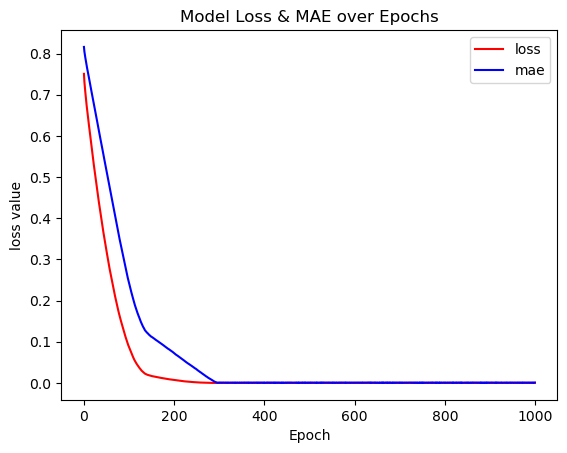

In [25]:
plt.plot(hist.history['loss'], 'r', label='loss')
plt.plot(hist.history['mae'], 'b', label='mae')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('loss value')
plt.title('Model Loss & MAE over Epochs')
plt.show()

In [26]:
# 7. 모델 사용하기
model.predict(np.array([[0],[0.01],[0.02]]))

1/1 [==============================] - 0s 55ms/step


array([[0.31995472],
       [0.33795017],
       [0.3559456 ]], dtype=float32)

In [27]:
model.save('model/after_learning.h5')

In [35]:
y_hat=model.predict([scaled_data_c])
for y, h in zip(scaled_data_f, y_hat):
    print('실제값:{}, 예측값:{}'.format(round(y*100,1),round(h[0]*100,1)))

4/4 [==============================] - 0s 2ms/step
실제값:32.0, 예측값:32.0
실제값:33.8, 예측값:33.8
실제값:35.6, 예측값:35.6
실제값:37.4, 예측값:37.4
실제값:39.2, 예측값:39.2
실제값:41.0, 예측값:41.0
실제값:42.8, 예측값:42.8
실제값:44.6, 예측값:44.6
실제값:46.4, 예측값:46.4
실제값:48.2, 예측값:48.2
실제값:50.0, 예측값:50.0
실제값:51.8, 예측값:51.8
실제값:53.6, 예측값:53.6
실제값:55.4, 예측값:55.4
실제값:57.2, 예측값:57.2
실제값:59.0, 예측값:59.0
실제값:60.8, 예측값:60.8
실제값:62.6, 예측값:62.6
실제값:64.4, 예측값:64.4
실제값:66.2, 예측값:66.2
실제값:68.0, 예측값:68.0
실제값:69.8, 예측값:69.8
실제값:71.6, 예측값:71.6
실제값:73.4, 예측값:73.4
실제값:75.2, 예측값:75.2
실제값:77.0, 예측값:77.0
실제값:78.8, 예측값:78.8
실제값:80.6, 예측값:80.6
실제값:82.4, 예측값:82.4
실제값:84.2, 예측값:84.2
실제값:86.0, 예측값:86.0
실제값:87.8, 예측값:87.8
실제값:89.6, 예측값:89.6
실제값:91.4, 예측값:91.4
실제값:93.2, 예측값:93.2
실제값:95.0, 예측값:95.0
실제값:96.8, 예측값:96.8
실제값:98.6, 예측값:98.6
실제값:100.4, 예측값:100.4
실제값:102.2, 예측값:102.2
실제값:104.0, 예측값:104.0
실제값:105.8, 예측값:105.8
실제값:107.6, 예측값:107.6
실제값:109.4, 예측값:109.4
실제값:111.2, 예측값:111.2
실제값:113.0, 예측값:113.0
실제값:114.8, 예측값:114.8
실제값:116.6, 예측값:116.6
실제값:118.4, 예측값:11

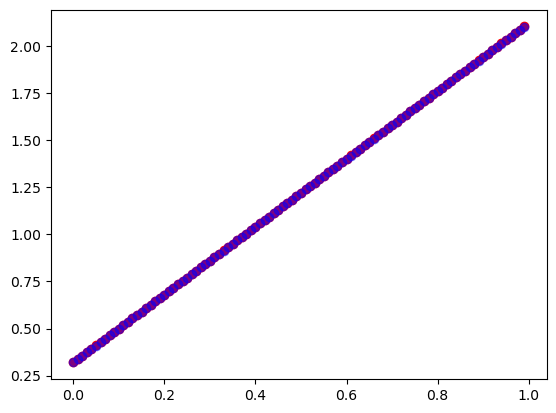

In [37]:
plt.scatter(x=scaled_data_c, y=scaled_data_f, c='r')
plt.scatter(x=scaled_data_c, y=y_hat, c='b', alpha=0.5)
plt.show()

## 2.2 노이즈가 있는 데이터로 실습

In [38]:
# 평균이 0이고 표준편차가 0.1인 데이터 100
np.random.seed(7)
noise = np.random.normal(loc=0, scale=0.1, size=100)
scaled_data_f = scaled_data_f+noise
scaled_data_f

array([0.48905257, 0.29140626, 0.35928202, 0.41475163, 0.3131077 ,
       0.41020656, 0.42791096, 0.27052757, 0.5657658 , 0.54204985,
       0.4374571 , 0.50084517, 0.58652994, 0.52786436, 0.54772509,
       0.44467586, 0.66345803, 0.63838809, 0.67144599, 0.50934755,
       0.84506997, 0.71343355, 0.67728601, 0.93690722, 0.7474614 ,
       0.62493213, 0.74747721, 0.57716849, 0.92893965, 0.80035257,
       0.78574465, 0.98524701, 0.73089244, 0.96754294, 0.72555852,
       0.88378407, 0.84757802, 1.13219756, 1.18061609, 0.98905862,
       1.12407332, 1.04000136, 1.13280619, 1.01871628, 0.94116608,
       0.94969013, 1.18631219, 1.39075951, 1.21094116, 1.14953954,
       1.41120189, 1.26173018, 1.2661434 , 1.29925777, 1.27876228,
       1.27905237, 1.18450365, 1.39616241, 1.35452245, 1.50130859,
       1.36311815, 1.22736301, 1.42603894, 1.62395373, 1.43365769,
       1.40101431, 1.38864081, 1.42099832, 1.51398063, 1.44400179,
       1.72976391, 1.56973648, 1.62686484, 1.77782395, 1.80233

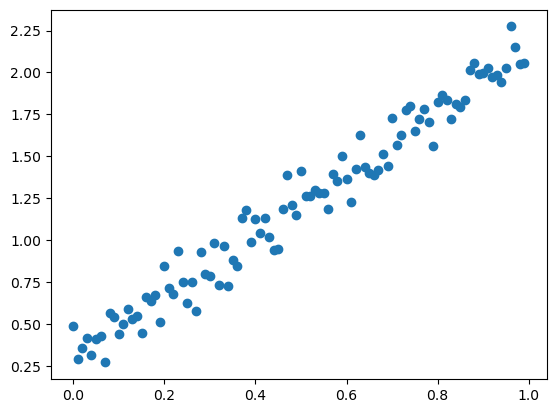

In [39]:
plt.scatter(x=scaled_data_c, y=scaled_data_f)
plt.show()

In [40]:
# 3. 모델 구성
model2 = Sequential()
model2.add(Dense(1, input_shape=(1,)))

# 4. 모델 학습 과정 설정
model2.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [41]:
# 5. 학습시키기
hist2 = model2.fit(
    scaled_data_c,
    scaled_data_f,
    epochs=1000,
    verbose=2
)

Epoch 1/1000
4/4 - 0s - loss: 1.6217 - mae: 1.1648 - 338ms/epoch - 84ms/step
Epoch 2/1000
4/4 - 0s - loss: 1.5936 - mae: 1.1536 - 17ms/epoch - 4ms/step
Epoch 3/1000
4/4 - 0s - loss: 1.5723 - mae: 1.1452 - 15ms/epoch - 4ms/step
Epoch 4/1000
4/4 - 0s - loss: 1.5547 - mae: 1.1380 - 18ms/epoch - 5ms/step
Epoch 5/1000
4/4 - 0s - loss: 1.5387 - mae: 1.1314 - 17ms/epoch - 4ms/step
Epoch 6/1000
4/4 - 0s - loss: 1.5238 - mae: 1.1254 - 17ms/epoch - 4ms/step
Epoch 7/1000
4/4 - 0s - loss: 1.5092 - mae: 1.1194 - 15ms/epoch - 4ms/step
Epoch 8/1000
4/4 - 0s - loss: 1.4945 - mae: 1.1133 - 13ms/epoch - 3ms/step
Epoch 9/1000
4/4 - 0s - loss: 1.4806 - mae: 1.1075 - 0s/epoch - 0s/step
Epoch 10/1000
4/4 - 0s - loss: 1.4661 - mae: 1.1014 - 12ms/epoch - 3ms/step
Epoch 11/1000
4/4 - 0s - loss: 1.4519 - mae: 1.0955 - 11ms/epoch - 3ms/step
Epoch 12/1000
4/4 - 0s - loss: 1.4377 - mae: 1.0895 - 11ms/epoch - 3ms/step
Epoch 13/1000
4/4 - 0s - loss: 1.4231 - mae: 1.0834 - 12ms/epoch - 3ms/step
Epoch 14/1000
4/4 - 0s

Epoch 109/1000
4/4 - 0s - loss: 0.4365 - mae: 0.5447 - 16ms/epoch - 4ms/step
Epoch 110/1000
4/4 - 0s - loss: 0.4296 - mae: 0.5398 - 15ms/epoch - 4ms/step
Epoch 111/1000
4/4 - 0s - loss: 0.4230 - mae: 0.5351 - 18ms/epoch - 4ms/step
Epoch 112/1000
4/4 - 0s - loss: 0.4155 - mae: 0.5298 - 18ms/epoch - 5ms/step
Epoch 113/1000
4/4 - 0s - loss: 0.4083 - mae: 0.5245 - 12ms/epoch - 3ms/step
Epoch 114/1000
4/4 - 0s - loss: 0.4023 - mae: 0.5202 - 14ms/epoch - 3ms/step
Epoch 115/1000
4/4 - 0s - loss: 0.3956 - mae: 0.5154 - 11ms/epoch - 3ms/step
Epoch 116/1000
4/4 - 0s - loss: 0.3888 - mae: 0.5105 - 12ms/epoch - 3ms/step
Epoch 117/1000
4/4 - 0s - loss: 0.3825 - mae: 0.5058 - 13ms/epoch - 3ms/step
Epoch 118/1000
4/4 - 0s - loss: 0.3757 - mae: 0.5008 - 13ms/epoch - 3ms/step
Epoch 119/1000
4/4 - 0s - loss: 0.3705 - mae: 0.4970 - 13ms/epoch - 3ms/step
Epoch 120/1000
4/4 - 0s - loss: 0.3637 - mae: 0.4920 - 12ms/epoch - 3ms/step
Epoch 121/1000
4/4 - 0s - loss: 0.3579 - mae: 0.4876 - 13ms/epoch - 3ms/step

Epoch 216/1000
4/4 - 0s - loss: 0.0840 - mae: 0.2467 - 11ms/epoch - 3ms/step
Epoch 217/1000
4/4 - 0s - loss: 0.0835 - mae: 0.2460 - 12ms/epoch - 3ms/step
Epoch 218/1000
4/4 - 0s - loss: 0.0827 - mae: 0.2445 - 13ms/epoch - 3ms/step
Epoch 219/1000
4/4 - 0s - loss: 0.0824 - mae: 0.2440 - 6ms/epoch - 2ms/step
Epoch 220/1000
4/4 - 0s - loss: 0.0818 - mae: 0.2429 - 22ms/epoch - 5ms/step
Epoch 221/1000
4/4 - 0s - loss: 0.0815 - mae: 0.2424 - 11ms/epoch - 3ms/step
Epoch 222/1000
4/4 - 0s - loss: 0.0809 - mae: 0.2414 - 12ms/epoch - 3ms/step
Epoch 223/1000
4/4 - 0s - loss: 0.0806 - mae: 0.2409 - 13ms/epoch - 3ms/step
Epoch 224/1000
4/4 - 0s - loss: 0.0800 - mae: 0.2397 - 10ms/epoch - 3ms/step
Epoch 225/1000
4/4 - 0s - loss: 0.0796 - mae: 0.2390 - 11ms/epoch - 3ms/step
Epoch 226/1000
4/4 - 0s - loss: 0.0791 - mae: 0.2382 - 11ms/epoch - 3ms/step
Epoch 227/1000
4/4 - 0s - loss: 0.0786 - mae: 0.2370 - 10ms/epoch - 3ms/step
Epoch 228/1000
4/4 - 0s - loss: 0.0781 - mae: 0.2362 - 13ms/epoch - 3ms/step


Epoch 323/1000
4/4 - 0s - loss: 0.0402 - mae: 0.1672 - 10ms/epoch - 3ms/step
Epoch 324/1000
4/4 - 0s - loss: 0.0398 - mae: 0.1663 - 12ms/epoch - 3ms/step
Epoch 325/1000
4/4 - 0s - loss: 0.0395 - mae: 0.1657 - 12ms/epoch - 3ms/step
Epoch 326/1000
4/4 - 0s - loss: 0.0392 - mae: 0.1650 - 11ms/epoch - 3ms/step
Epoch 327/1000
4/4 - 0s - loss: 0.0388 - mae: 0.1641 - 12ms/epoch - 3ms/step
Epoch 328/1000
4/4 - 0s - loss: 0.0385 - mae: 0.1634 - 4ms/epoch - 986us/step
Epoch 329/1000
4/4 - 0s - loss: 0.0382 - mae: 0.1628 - 25ms/epoch - 6ms/step
Epoch 330/1000
4/4 - 0s - loss: 0.0379 - mae: 0.1622 - 13ms/epoch - 3ms/step
Epoch 331/1000
4/4 - 0s - loss: 0.0376 - mae: 0.1615 - 13ms/epoch - 3ms/step
Epoch 332/1000
4/4 - 0s - loss: 0.0372 - mae: 0.1608 - 13ms/epoch - 3ms/step
Epoch 333/1000
4/4 - 0s - loss: 0.0369 - mae: 0.1599 - 13ms/epoch - 3ms/step
Epoch 334/1000
4/4 - 0s - loss: 0.0365 - mae: 0.1590 - 11ms/epoch - 3ms/step
Epoch 335/1000
4/4 - 0s - loss: 0.0362 - mae: 0.1586 - 14ms/epoch - 4ms/ste

Epoch 430/1000
4/4 - 0s - loss: 0.0168 - mae: 0.1056 - 12ms/epoch - 3ms/step
Epoch 431/1000
4/4 - 0s - loss: 0.0166 - mae: 0.1052 - 12ms/epoch - 3ms/step
Epoch 432/1000
4/4 - 0s - loss: 0.0165 - mae: 0.1049 - 12ms/epoch - 3ms/step
Epoch 433/1000
4/4 - 0s - loss: 0.0164 - mae: 0.1043 - 7ms/epoch - 2ms/step
Epoch 434/1000
4/4 - 0s - loss: 0.0163 - mae: 0.1038 - 21ms/epoch - 5ms/step
Epoch 435/1000
4/4 - 0s - loss: 0.0162 - mae: 0.1034 - 12ms/epoch - 3ms/step
Epoch 436/1000
4/4 - 0s - loss: 0.0161 - mae: 0.1030 - 14ms/epoch - 4ms/step
Epoch 437/1000
4/4 - 0s - loss: 0.0160 - mae: 0.1027 - 12ms/epoch - 3ms/step
Epoch 438/1000
4/4 - 0s - loss: 0.0158 - mae: 0.1021 - 11ms/epoch - 3ms/step
Epoch 439/1000
4/4 - 0s - loss: 0.0157 - mae: 0.1018 - 10ms/epoch - 2ms/step
Epoch 440/1000
4/4 - 0s - loss: 0.0155 - mae: 0.1012 - 11ms/epoch - 3ms/step
Epoch 441/1000
4/4 - 0s - loss: 0.0154 - mae: 0.1006 - 13ms/epoch - 3ms/step
Epoch 442/1000
4/4 - 0s - loss: 0.0153 - mae: 0.1001 - 13ms/epoch - 3ms/step


Epoch 537/1000
4/4 - 0s - loss: 0.0107 - mae: 0.0813 - 11ms/epoch - 3ms/step
Epoch 538/1000
4/4 - 0s - loss: 0.0107 - mae: 0.0811 - 12ms/epoch - 3ms/step
Epoch 539/1000
4/4 - 0s - loss: 0.0107 - mae: 0.0810 - 11ms/epoch - 3ms/step
Epoch 540/1000
4/4 - 0s - loss: 0.0107 - mae: 0.0812 - 12ms/epoch - 3ms/step
Epoch 541/1000
4/4 - 0s - loss: 0.0107 - mae: 0.0812 - 13ms/epoch - 3ms/step
Epoch 542/1000
4/4 - 0s - loss: 0.0107 - mae: 0.0810 - 12ms/epoch - 3ms/step
Epoch 543/1000
4/4 - 0s - loss: 0.0106 - mae: 0.0810 - 13ms/epoch - 3ms/step
Epoch 544/1000
4/4 - 0s - loss: 0.0106 - mae: 0.0808 - 14ms/epoch - 4ms/step
Epoch 545/1000
4/4 - 0s - loss: 0.0106 - mae: 0.0809 - 12ms/epoch - 3ms/step
Epoch 546/1000
4/4 - 0s - loss: 0.0106 - mae: 0.0811 - 10ms/epoch - 3ms/step
Epoch 547/1000
4/4 - 0s - loss: 0.0106 - mae: 0.0811 - 12ms/epoch - 3ms/step
Epoch 548/1000
4/4 - 0s - loss: 0.0106 - mae: 0.0810 - 0s/epoch - 0s/step
Epoch 549/1000
4/4 - 0s - loss: 0.0106 - mae: 0.0812 - 12ms/epoch - 3ms/step
Ep

Epoch 644/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 11ms/epoch - 3ms/step
Epoch 645/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 12ms/epoch - 3ms/step
Epoch 646/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 13ms/epoch - 3ms/step
Epoch 647/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 12ms/epoch - 3ms/step
Epoch 648/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 12ms/epoch - 3ms/step
Epoch 649/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0803 - 13ms/epoch - 3ms/step
Epoch 650/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 16ms/epoch - 4ms/step
Epoch 651/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0802 - 11ms/epoch - 3ms/step
Epoch 652/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 12ms/epoch - 3ms/step
Epoch 653/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0803 - 6ms/epoch - 2ms/step
Epoch 654/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0801 - 22ms/epoch - 6ms/step
Epoch 655/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0801 - 13ms/epoch - 3ms/step
Epoch 656/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 12ms/epoch - 3ms/step


Epoch 751/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 12ms/epoch - 3ms/step
Epoch 752/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 11ms/epoch - 3ms/step
Epoch 753/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 10ms/epoch - 2ms/step
Epoch 754/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 13ms/epoch - 3ms/step
Epoch 755/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 12ms/epoch - 3ms/step
Epoch 756/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 6ms/epoch - 2ms/step
Epoch 757/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0803 - 23ms/epoch - 6ms/step
Epoch 758/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0802 - 27ms/epoch - 7ms/step
Epoch 759/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0802 - 13ms/epoch - 3ms/step
Epoch 760/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 13ms/epoch - 3ms/step
Epoch 761/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 11ms/epoch - 3ms/step
Epoch 762/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 11ms/epoch - 3ms/step
Epoch 763/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 10ms/epoch - 3ms/step


Epoch 858/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 12ms/epoch - 3ms/step
Epoch 859/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 11ms/epoch - 3ms/step
Epoch 860/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0809 - 13ms/epoch - 3ms/step
Epoch 861/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0809 - 14ms/epoch - 3ms/step
Epoch 862/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0811 - 12ms/epoch - 3ms/step
Epoch 863/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0808 - 12ms/epoch - 3ms/step
Epoch 864/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 12ms/epoch - 3ms/step
Epoch 865/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 11ms/epoch - 3ms/step
Epoch 866/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 12ms/epoch - 3ms/step
Epoch 867/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 17ms/epoch - 4ms/step
Epoch 868/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0804 - 17ms/epoch - 4ms/step
Epoch 869/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 12ms/epoch - 3ms/step
Epoch 870/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 14ms/epoch - 4ms/step

Epoch 965/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 12ms/epoch - 3ms/step
Epoch 966/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 13ms/epoch - 3ms/step
Epoch 967/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 12ms/epoch - 3ms/step
Epoch 968/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 12ms/epoch - 3ms/step
Epoch 969/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 13ms/epoch - 3ms/step
Epoch 970/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 12ms/epoch - 3ms/step
Epoch 971/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0805 - 13ms/epoch - 3ms/step
Epoch 972/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0806 - 12ms/epoch - 3ms/step
Epoch 973/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0809 - 12ms/epoch - 3ms/step
Epoch 974/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0809 - 13ms/epoch - 3ms/step
Epoch 975/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0808 - 15ms/epoch - 4ms/step
Epoch 976/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 13ms/epoch - 3ms/step
Epoch 977/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0807 - 13ms/epoch - 3ms/step

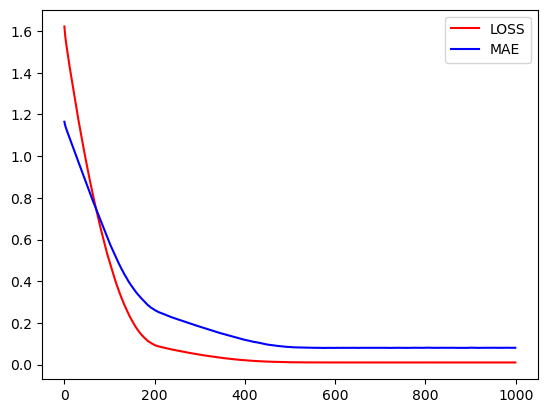

In [43]:
# 6. 평가하기
plt.plot(hist2.history['loss'], 'r', label='LOSS')
plt.plot(hist2.history['mae'], 'b', label='MAE')
plt.legend()
plt.show()

In [44]:
# 7. 예측하기
model2.predict(np.array([[0],[0.01]]))

1/1 [==============================] - 0s 93ms/step


array([[0.30608675],
       [0.32448405]], dtype=float32)

In [45]:
y_hat2 = model2.predict([scaled_data_c])

4/4 [==============================] - 0s 2ms/step


In [46]:
for h, y in zip(y_hat2, scaled_data_f):
    print(f'예측값 : {h}, 실제값 : {y}')

예측값 : [0.30608675], 실제값 : 0.48905257038003563
예측값 : [0.32448405], 실제값 : 0.2914062629459167
예측값 : [0.34288132], 실제값 : 0.3592820163678585
예측값 : [0.3612786], 실제값 : 0.4147516282996508
예측값 : [0.3796759], 실제값 : 0.31310769713742614
예측값 : [0.3980732], 실제값 : 0.4102065572905948
예측값 : [0.41647047], 실제값 : 0.42791096141420687
예측값 : [0.43486774], 실제값 : 0.2705275693654579
예측값 : [0.45326504], 실제값 : 0.5657658005663493
예측값 : [0.47166234], 실제값 : 0.542049851591955
예측값 : [0.4900596], 실제값 : 0.43745710260332404
예측값 : [0.5084569], 실제값 : 0.5008451738804279
예측값 : [0.52685416], 실제값 : 0.5865299374196752
예측값 : [0.5452515], 실제값 : 0.5278643584808353
예측값 : [0.56364876], 실제값 : 0.5477250921327455
예측값 : [0.58204603], 실제값 : 0.44467585875092086
예측값 : [0.60044336], 실제값 : 0.6634580311891888
예측값 : [0.61884063], 실제값 : 0.6383880905287038
예측값 : [0.6372379], 실제값 : 0.6714459923759963
예측값 : [0.65563524], 실제값 : 0.509347546813016
예측값 : [0.6740325], 실제값 : 0.8450699691186476
예측값 : [0.6924298], 실제값 : 0.7134335535456359
예측값 : [0.7108270

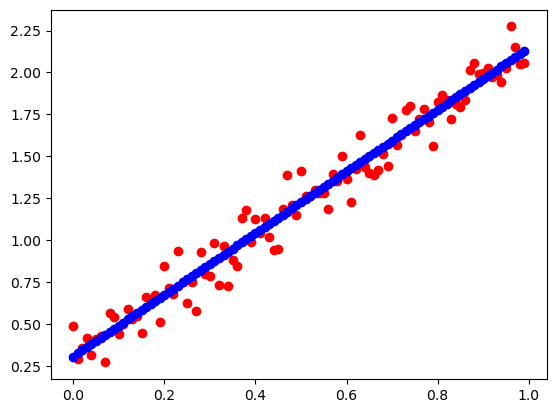

In [50]:
plt.scatter(x=scaled_data_c, y=scaled_data_f, c='r')
plt.scatter(x=scaled_data_c, y=y_hat2, c='b')
plt.show()